In [1]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib
from pathlib import Path

# Directories
PROJECT_ROOT = Path("/Users/Video anomaly")
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
MODELS_DIR = PROJECT_ROOT / "models"

# Load the trained model
model = joblib.load(MODELS_DIR / "rf_model.pkl")
print("✅ Model loaded")

# Load enhanced features
df = pd.read_csv(PROCESSED_DIR / "metadata" / "enhanced_features.csv")
feature_columns = ['mean_motion', 'max_motion', 'std_motion', 'mean_flow', 'max_flow']
X = df[feature_columns]
y = df['label']

# Split data (same as training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Test set size: {len(X_test)} samples")

✅ Model loaded
Test set size: 40 samples


In [2]:
# Cell 2: Predictions and Metrics
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.29      0.33      0.31         6

    accuracy                           0.78        40
   macro avg       0.58      0.59      0.59        40
weighted avg       0.79      0.78      0.78        40


Confusion Matrix:
[[29  5]
 [ 4  2]]


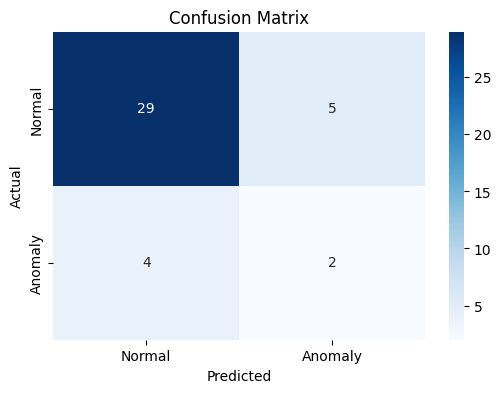

In [3]:
# Cell 3: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

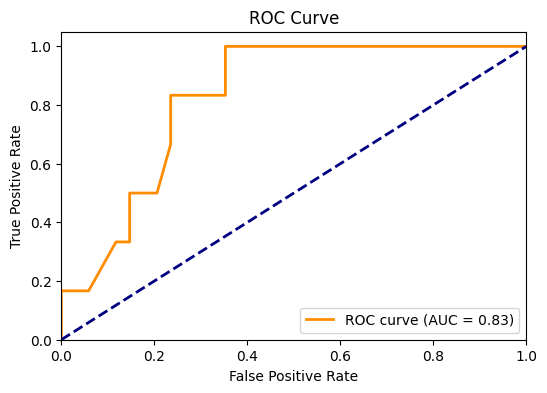

In [4]:
# Cell 4: ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (anomaly)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

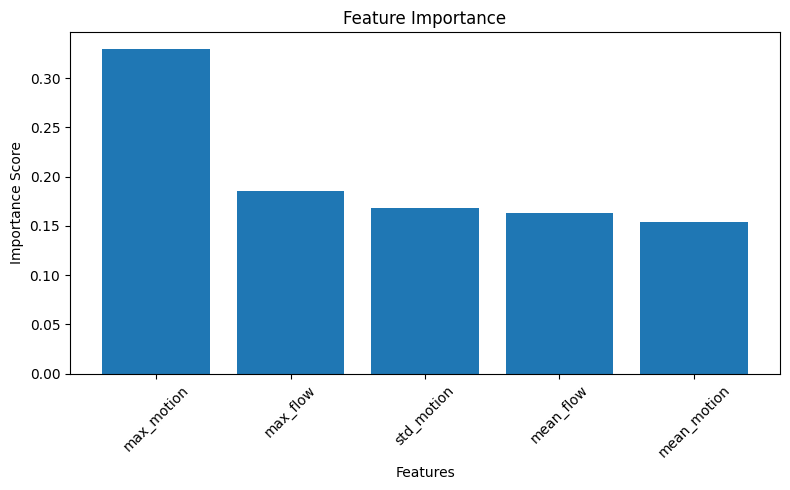

In [5]:
# Cell 5: Feature Importance
importances = model.feature_importances_
feature_names = feature_columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

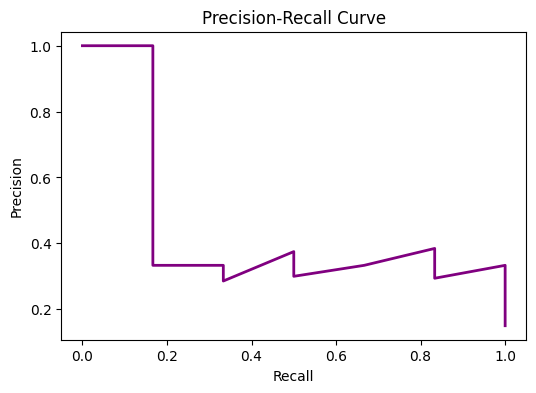

In [6]:
# Cell 6: Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()